In [2]:
from causalsim import *
import metrics
from econml.metalearners import XLearner
from econml.dr import DRLearner
from econml.dml import CausalForestDML
from econml.metalearners import TLearner
from econml.metalearners import SLearner
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Data Generation 
#### Simple model: Treatment effect for individual i: \tau_i = \beta * x_{i1} 

In [3]:
n = 1000  # Number of individuals
p = 1     # Number of covariates
beta = 1  # Beta_1 value for treatment effect
sigma = 1 # Sigma value for noise term
data = simulation_simple(n = n, p = p, beta = beta, sigma = sigma)
print(data.head(10))

         X1       tau  Z   epsilon         Y
0  0.430586  0.430586  1  0.462752  0.893338
1  0.037433  0.037433  1  0.664903  0.702336
2 -0.432555 -0.432555  0 -0.037979 -0.037979
3 -1.090642 -1.090642  0  0.615598  0.615598
4  0.653135  0.653135  0  0.868013  0.868013
5 -1.419457 -1.419457  1  1.297772 -0.121684
6 -2.011673 -2.011673  0 -1.333535 -1.333535
7  0.304025  0.304025  1 -0.000883  0.303142
8 -1.901210 -1.901210  1  0.884042 -1.017168
9  0.002087  0.002087  0  1.687040  1.687040


In [4]:
data = simulation_XLearner_1(100000, 20)
data[data['Z'] == 1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,tau,Z,epsilon,Y
9,-0.496088,-0.022766,0.070395,0.568984,-1.273381,0.789586,1.674101,-2.143463,-1.120339,0.320016,...,1.147562,-0.108353,1.732981,0.759770,0.095565,1.384467,0,1,-1.641734,-41.761279
34,1.428249,0.111888,-1.872457,0.335519,-0.601716,-0.136839,-0.297459,-0.001404,0.913241,-0.604531,...,2.176798,0.222213,0.439354,-0.741435,0.151807,0.078273,8,1,0.233723,16.718593
54,-0.296839,1.376749,-1.368360,0.719972,0.356114,-0.970081,-1.182227,-0.712525,1.141253,0.492262,...,-0.091870,-0.421431,-0.280111,-0.061651,0.993126,-0.707533,8,1,0.941153,23.906504
68,1.308216,0.314400,0.200765,0.932224,0.804101,-0.004734,0.034687,-0.576285,-0.185456,0.789252,...,-0.219679,-1.367686,0.623967,-1.080166,0.529251,-0.864805,8,1,1.362545,16.342097
78,-0.495750,0.668980,-1.559468,-1.939434,-0.257589,-2.101591,1.849060,0.391213,1.721842,-0.956719,...,-1.214125,-0.857637,0.601066,-0.990983,1.357827,0.162467,8,1,-0.780623,10.024649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99661,0.047342,1.664562,-0.303854,1.108347,-0.347439,-0.546837,-0.216583,-0.908900,-0.488691,0.484791,...,0.173938,-0.420381,0.809682,0.088223,0.112140,0.165189,8,1,1.346979,6.906960
99718,1.837694,0.765136,0.697709,-0.729011,-0.482960,-1.852329,0.285359,-0.241659,0.120036,1.042296,...,-0.640699,-0.523410,0.432556,1.615792,-1.061639,0.388801,8,1,1.117892,18.205613
99851,0.400210,-1.046333,0.646454,-0.493653,0.208957,1.641294,1.205927,1.757995,-0.313510,-1.310838,...,-0.511958,-0.374563,1.187983,-0.639020,1.606121,-0.055471,0,1,1.877053,-18.672353
99868,-1.000342,0.204487,0.055637,-0.703286,-2.818273,-0.173047,-0.250766,-0.512305,0.804282,-1.168389,...,-0.631479,0.690200,-0.202953,0.391542,1.899776,1.613736,8,1,0.890335,-4.408018


In [5]:
data = simulation_XLearner_2(10000, 20)
data[data['Z'] == 1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,tau,Z,epsilon,Y
5,0.510922,-1.817082,-1.594973,0.571762,-0.777915,0.623982,1.282032,0.264492,1.186613,0.493731,...,0.010461,-0.342461,-0.319631,0.517125,-0.431437,-0.402071,1.790642e-12,1,1.189606,1.189606
8,-1.259509,1.009924,-0.453839,-2.410090,1.376989,-3.231898,-1.461877,-2.266415,-0.064926,-2.333335,...,-2.758263,-0.311323,-2.397528,0.771279,0.187642,-0.097322,2.700017e-09,1,0.022761,0.022761
9,-1.385997,-0.466392,0.145577,-1.583378,-0.417157,-0.622967,-0.957486,-0.276111,-1.729182,1.232109,...,-0.690201,-0.530790,-1.385176,-0.053698,-0.876085,1.589605,5.454256e-15,1,-0.624549,-0.624549
10,1.254333,0.798270,0.367010,-0.657891,0.349204,-0.994788,0.378273,-0.215010,-1.160340,0.964544,...,1.269157,-0.821074,-0.345269,-0.121204,1.244953,-0.596740,3.890985e+00,1,-0.339703,1.605790
11,1.063775,0.419538,0.625613,-0.096946,0.019019,0.429319,-0.292479,0.264823,-0.327580,-0.777756,...,0.407919,0.408950,-0.867090,0.693258,0.943270,-0.402040,1.101805e+00,1,0.939508,1.490410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,0.072487,0.886892,-0.222091,-0.546104,-0.817975,1.097383,-1.677779,-1.323197,-1.088665,-0.470194,...,0.612121,0.396418,-0.416370,0.234470,0.401665,0.104153,2.329894e-02,1,-0.513094,-0.501445
9990,0.836832,-0.359444,1.877824,-1.392724,-1.156037,0.299168,-2.403004,-1.070167,-0.155979,-0.774120,...,-2.066243,-1.294091,0.225406,0.356336,-0.083870,0.033014,1.304558e-04,1,0.165716,0.165782
9992,-0.146303,0.999399,-0.607166,0.282746,1.053042,0.597330,0.509418,0.726671,-1.987248,0.032189,...,-0.039214,-0.642327,-1.559002,0.709444,-0.716761,1.413569,1.708288e-03,1,0.621995,0.622849
9994,0.903486,1.016679,1.383263,0.223697,-0.212241,1.069400,0.967520,-0.066778,-0.391266,0.930569,...,0.214944,-0.743171,0.611145,1.710056,0.446373,0.886692,3.960640e+00,1,-1.409148,0.571172


#### Categorical Model

In [3]:
n = 1000  # Number of individuals
p = 1     # Number of covariates
beta = 1  # Beta_1 value for treatment effect
sigma = 1 # Sigma value for noise term
data_cat = simulation_categorical(n = n, p = p, beta = beta, sigma = sigma)
print(data_cat.head(10))

         X1  tau  Z   epsilon         Y
0  1.023143    1  1  0.056511  1.056511
1 -0.299046    0  0 -1.296546 -1.296546
2 -0.556704    0  1  0.245307  0.245307
3 -1.052029    0  1  0.940470  0.940470
4 -0.326775    0  0 -0.107064 -0.107064
5 -1.649053    0  1  0.280066  0.280066
6  0.300468    1  0  1.277158  1.277158
7 -0.728725    0  0 -1.486377 -1.486377
8  0.510106    1  0 -0.995065 -0.995065
9 -0.542140    0  0 -0.575164 -0.575164


#### Assigning variables for econml metalearner functions

In [6]:
X = data[[col for col in data.columns if col.startswith('X')]]
T = data['Z'] #treatment indicator
y = data['Y']
tau = np.array(data['tau'])

## Linear Regression

#### y ~ X + Z + X*Z

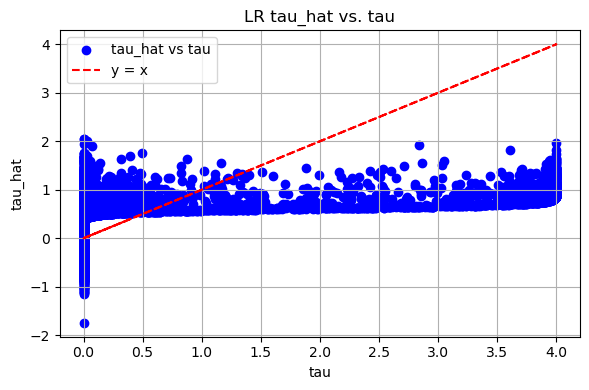

In [7]:
data_lr = data.copy()
data_lr['X1*Z'] = data_lr['X1'] * data_lr['Z'] #Setting interaction term
lr_xfit = data_lr[['X1', 'Z', 'X1*Z']]

lr = LinearRegression() #Fit linear regression
lr.fit(lr_xfit, data_lr['Y'])

bz = lr.coef_[1]
bzx = lr.coef_[2]

tau_hat_lr = bz + bzx*data['X1']


mse_lr, bias_lr, r2_lr = metrics.evaluate(tau, tau_hat_lr)

metrics.tau_plot(tau, tau_hat_lr, 'LR tau_hat vs. tau')

In [8]:
print(f'LR metrics:\nMse: {mse_lr}\nBias: {bias_lr}\nR2 {r2_lr}')

LR metrics:
Mse: 0.9283103553178811
Bias: -0.0017415953679959322
R2 0.1632250556446917


## X-Learner

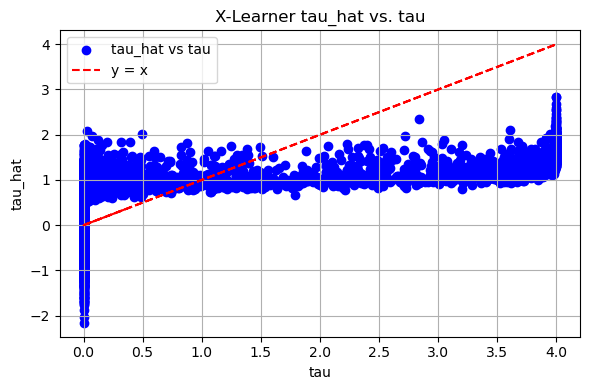

In [9]:
est = XLearner(models=LinearRegression())
est.fit(y, T, X=X)
tau_hat_x = est.effect(X)
mse_x, bias_x, r2_x = metrics.evaluate(tau, tau_hat_x)
metrics.tau_plot(tau, tau_hat_x, 'X-Learner tau_hat vs. tau')

In [10]:
print(f'X-learner metrics:\nMse: {mse_x}\nBias: {bias_x}\nR2 {r2_x}')

X-learner metrics:
Mse: 0.7491529903127837
Bias: -0.00016238825057756116
R2 0.3247167305723606


## S + T Learner

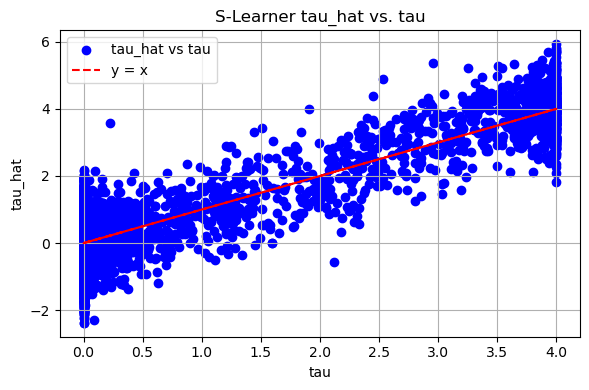

In [11]:
est = SLearner(overall_model=RandomForestRegressor())
est.fit(y, T, X=X)
tau_hat_s = est.effect(X)

mse_s, bias_s, r2_s = metrics.evaluate(tau, tau_hat_s)
metrics.tau_plot(tau, tau_hat_s, 'S-Learner tau_hat vs. tau')

In [19]:
print(f'S-learner metrics:\nMse: {mse_s}\nBias: {bias_s}\nR2 {r2_s}')

S-learner metrics:
Mse: 0.4351414858689018
Bias: -0.0019287667724128934
R2 0.6077653442743807


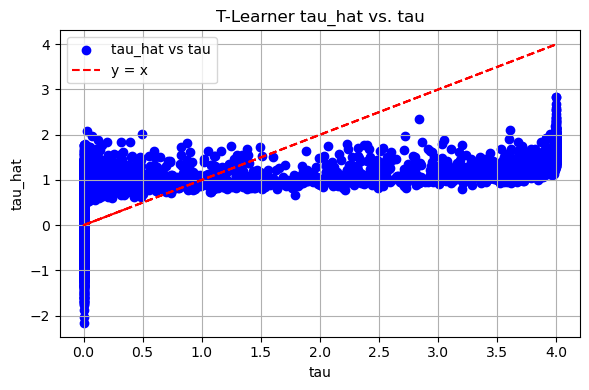

In [21]:
est = TLearner(models=RandomForestRegressor())
est.fit(y, T, X=X)
tau_hat_t = est.effect(X)
tau_hat_t = Causal_TLearner(data, LinearRegression())
mse_t, bias_t, r2_t = metrics.evaluate(tau, tau_hat_t)
metrics.tau_plot(tau, tau_hat_t, 'T-Learner tau_hat vs. tau')

In [22]:
print(f'T-learner metrics:\nMse: {mse_t}\nBias: {bias_t}\nR2 {r2_t}')

T-learner metrics:
Mse: 0.7491529903127837
Bias: -0.00016238825057754696
R2 0.3247167305723606


## DR-Learner

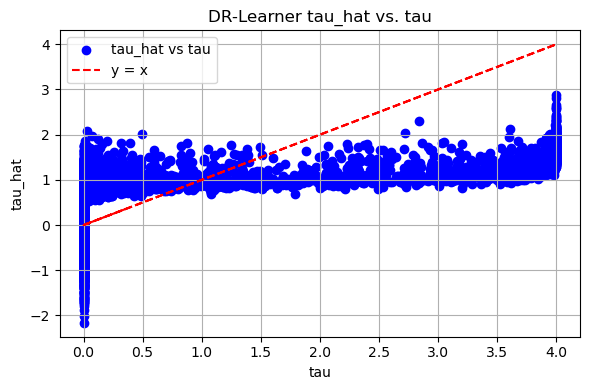

In [15]:
est = DRLearner()
est.fit(y, T, X=X, W=None)
tau_hat_dr = est.effect(X)

mse_dr, bias_dr, r2_dr = metrics.evaluate(tau, tau_hat_dr)
metrics.tau_plot(tau, tau_hat_dr, 'DR-Learner tau_hat vs. tau')

In [16]:
print(f'DR-learner metrics:\nMse: {mse_dr}\nBias: {bias_dr}\nR2 {r2_dr}')

DR-learner metrics:
Mse: 0.7489809065648966
Bias: 5.50437104629097e-05
R2 0.32487184611937336


## Causal Forest

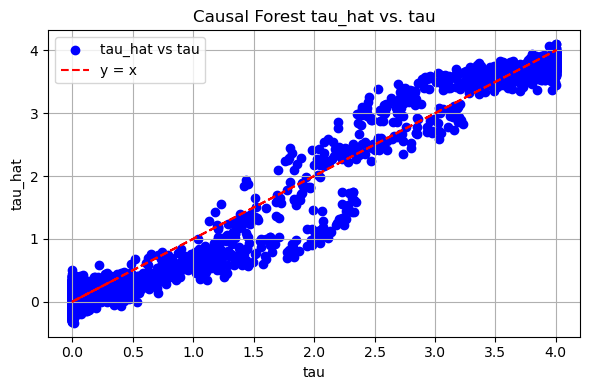

In [17]:
est = CausalForestDML(discrete_treatment=True)
est.fit(y, T, X=X, W=None)
tau_hat_cf = est.effect(X)

mse_cf, bias_cf, r2_cf = metrics.evaluate(tau, tau_hat_cf)
metrics.tau_plot(tau, tau_hat_cf, 'Causal Forest tau_hat vs. tau')

In [20]:
print(f'Causal Forest metrics:\nMse: {mse_cf}\nBias: {bias_cf}\nR2 {r2_cf}')

Causal Forest metrics:
Mse: 0.02633817140127137
Bias: -0.006201243162513906
R2 0.9762588860692256
